##**Mid-term Project**

For this midterm project, I want to work on the relationship between wealth and corona virus deaths. It seems to me that the regions that are short access to vaccination tend to have a higher death rates and COVID infection rates and the main reason for this shortage is from the economic situation of the nation. I have found three data sets that I will use for this project about GDP growth, world’s covid cases and deaths, and vaccination rate in some country. In these three data sets provide the GDP growth in 2015, the number of people receiving the first, second and boosted shots in different
countries, and the COVID cases, COVID death in 2020 and 2021. One problem I encountered during this process wat that I was not able to find the public data of GDP growth in the recent. Furthermore, there are data sets that project the GDP growth of countries around to world up to 2030 but I believe the effect corona virus have on the world’s economy growth is substantial. Thus, I decided to stick to 2015’s data. I also
found some other data sets but they either mainly focus on one country only or they will not contain the nations’ population or the death rate for comparision. However, in these three data sets arise a problem, such that contain unnecessary to answer my question. I am planning to write about 7 functions, including:


``` def clean_data(data) ``` to process and clean data so that I can work on it

``` def convert_to_DoL(data) ``` to convert 1 processed data to DoL

``` def convert_to_LoL(data) ``` to convert 1 processed data to LoL

``` def convert_to_DataFrame (data) ``` to convert the data structures to pandas DataFrames

``` def comparison_vaccination (data) ``` to show the crelationship in COVID-infected cases and death cases between nations which have high access to vaccination and that have low vaccination rate

 
``` def comparison_gdp (data) ``` to show the relationship between nations with high gdp and their access to vaccination

``` def main () ``` to coordinate above functions and thus, conclude if there is a relationship between COVID cases, deaths and GDP and if vaccination is the cause.

The datasets I am using for today's project are:

covid.csv: https://drive.google.com/file/d/1-rrckUR3Vr5zSExk4Ho1PGU9dsJSB3sM/view?usp=sharing

gdp.csv: https://drive.google.com/file/d/13R9ebYM1ZYFBLMklskZEp1s8GTFkDYUX/view?usp=sharing

vaccination.csv: https://drive.google.com/file/d/10Qot_LrbFRiFDd0sg2_IbCfoUaUOk1XV/view?usp=sharing

In [3]:
import pandas as pd
import numpy as np

#Parsing Datasets

For this project, I will use 
```clean_data```
 function to process data and strip unnecessary characters in the data file - such as "\n" - then append the processed data into a ```line``` list.


In [4]:
def clean_data(filename):
  with open(filename,'r') as fi:
    read_DoL = fi.readlines() #read each lines of file
  line = list()
  for lines in read_DoL:
    line.append(lines.strip('\n')) #strip \n at the end of line
  return line

# Dictionary of Lists

In order to build a DoL, I will use ```convert_to_DoL``` function.

For this part, I am using vaccination.csv dataset to test the validation of this function.



In [5]:
def convert_to_DoL(filename):
  line = clean_data(filename) #parse dataset
  index = line[0].split(',') 
  for i in range(len(index)):
    index[i] = index[i].replace("_"," ")
  DoL = {var:[] for var in index} #create DoL keys using the variables in index list
  for value in range(1,len(line)):
    temp = line[value].strip('\n').split(',') #strip \n at the end of line and split values and store into lists
    for column in range(len(index)):
      DoL[index[column]].append(temp[column]) #append corresponding value into lists in DoL dictionary
  return DoL


#List of lists

In order to build a LoL, I will use ```convert_to_LoL``` function.

For this part, I am using gdp.csv dataset to test the validation of this function.

In [6]:
def convert_to_LoL(filename):
  line = clean_data(filename) #parse data
  columns = []
  columns = line.pop(0).split(',') #create column list
  for value in range(len(columns)):
    columns[value] = columns[value].replace("_"," ") #replace _ with [space]

  LoL = []
  for value in range(len(line)):
    temp = line[value].split(',') #separate values into lists
    LoL.append(temp) #append lists into list
  return [LoL, columns]
#convert_to_LoL('gdp.csv')

#Pandas DataFrame

There are two ways to construct dataset into a Panda DataFrame: either directly by reading the csv file or indirectly through DoL or LoL.

For this ``` df ``` function, I create 2 conditions to process 2 different types of data (DoL/LoL or csv file).



In [7]:
def construct_df(filename, column =0):
  if column == 0 and type(filename) == str:
    df = pd.read_csv(filename)
  elif column == 0:
    df = pd.DataFrame(filename)
  else:
    df = pd.DataFrame(filename,columns=column)
  return df


#Clean data

When it comes to data cleaning, I believe that different data have different ways to "be cleaned up" dependinding on the users' purposes as well as the structure of the dataset. Thus, I did not create a specific function which can fit in well with every dataset but rather modify the dataset as I want in the ```main``` function.

More specifically:

For the ```covid.csv``` file, I only focus on the data from the ```Confirmed```, ```Deaths```, ```Deaths / 100```, ```Recovered / 100``` columns so that I could make equivalent comparisons between COVID cases, death and recover rates with GDP in one nation.

For the ```gdp.csv``` file, I decided to drop the rows in which the year value is not 2019. I chose 2019 because the pandemic happened at the beginning of 2020 and many nations had already been affected by it. Thus, if I chose GDP value in 2020, it would result in a biased dataset. Moreover, I also want to see what an effect COVID had on GDP in different nations so I created another DataFrame to compare the GDP of different countries in 2019 and 2020.
During this cleaning process, I encountered a problem, such that the value type in the ```GDP per capita``` and ```Year``` column is ```str``` instead of ```float```. Thus, I decided to create new lists for ```GDP``` and ```Year``` and add it to the ```gdp``` DataFrame while dropping the ```GDP per capita``` and ```Year``` columns. I later set the index of the DataFrame as ```Entity``` or country name and sort the DataFrame by its GDP value.

For the ```vaccination.csv``` file is a little bit more complex. I have to group by values, since the values are from different days (in other words, it has not been summed yet), to check for the information upon vaccination from a country.

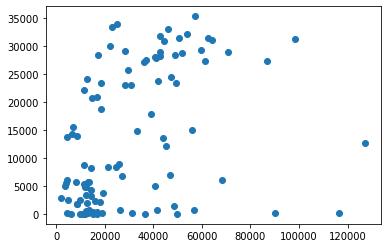

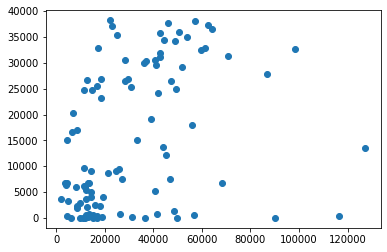

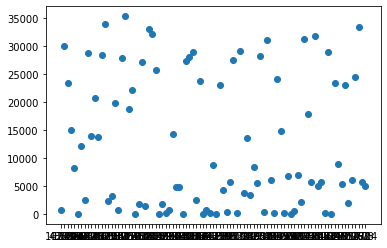

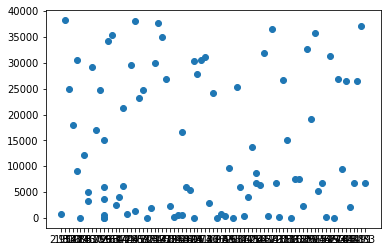

In [87]:
def main():
  #turn covid.csv into DataFrame using DoL
  DoL = convert_to_DoL('covid.csv')
  DoL = construct_df(DoL)

  #turn gdp.csv into DataFrame using LoL
  [LoL, columns] = convert_to_LoL('gdp.csv')
  LoL = construct_df(LoL, columns)

  #turn vaccination.csv into DataFrame using pandas
  df = construct_df('vaccination.csv')

  #drop N/A value in datasets
  clean_val = [DoL, LoL, df]
  for value in clean_val:
    value = value.dropna(inplace=True)
  
  #clean covid.csv 
  covid = DoL.reindex(columns=['Country/Region', 'Confirmed', 'Deaths', 'Deaths / 100 Cases', 'Recovered / 100 Cases'])
  covid = covid.set_index('Country/Region')
  sort_by_death_rate = covid.sort_values(by='Deaths / 100 Cases')
  sort_by_death = covid.sort_values(by='Deaths')
  sort_by_recovered_rate = covid.sort_values(by='Recovered / 100 Cases')
  sort_by_confirmed = covid.sort_values(by='Confirmed')


  #clean gdp.csv
  GDP = []
  Year = []
  for value in LoL['GDP per capita']:
    GDP.append(float(value))
  for number in LoL['Year']:
    Year.append(int(number))
  LoL.drop(['GDP per capita', 'Year'], axis = 1, inplace=True)
  LoL['GDP'] = GDP
  LoL['Year'] = Year
  LoL.columns.str.strip()
  compare = LoL.copy()
  compare = compare[compare['Year'] == 2020]
  compare = compare.set_index('Entity')
  compare = compare.sort_values(by='GDP')
  LoL = LoL[LoL['Year'] == 2019]
  LoL = LoL.set_index('Entity')
  LoL = LoL.sort_values(by='GDP')
  combined = pd.concat([LoL,compare], axis = 1, keys = pd.Index([2019,2020]))
  

  #clean vaccination.csv by 
  df1 = df.groupby('location')
  dfk = df1.agg({'total_vaccinations':sum,'people_vaccinated':sum, 'total_vaccinations_per_hundred':sum, 'total_vaccinations_per_hundred':sum, 'people_vaccinated_per_hundred':sum, 'people_fully_vaccinated_per_hundred':sum})
  people_fully_vaccinated_per_hundred = dfk.sort_values(by='people_fully_vaccinated_per_hundred')
  

  comparison_gdp(LoL['GDP'],people_fully_vaccinated_per_hundred['people_fully_vaccinated_per_hundred'],'people_fully_vaccinated_per_hundred')
  comparison_gdp(LoL['GDP'],people_fully_vaccinated_per_hundred['people_vaccinated_per_hundred'], 'people_vaccinated_per_hundred')

  comparison_vaccination (covid['Confirmed'], people_fully_vaccinated_per_hundred['people_fully_vaccinated_per_hundred'],'Confirmed','people_fully_vaccinated_per_hundred')
  comparison_vaccination (covid['Deaths / 100 Cases'], people_fully_vaccinated_per_hundred['people_vaccinated_per_hundred'], 'Deaths / 100 Cases','people_vaccinated_per_hundred')
main()


#Comparison and Conclusion

I plotted the nation's GDP and their fully-vaccination-per-hundred data as well as nation's GDP and their vaccination-per-hundred data on a scatter; *thus, I came to the conclusion that the relationship between nations with high gdp and
their access to vaccination is relatively weak.*

I plotted the nation's access to vaccination (through the rate of vaccinated people) and their death rates as well as infected cases and I came to a conclusion that *the COVID-infected cases or death cases does not have any relation to that nation's access to vaccination*







In [86]:
import matplotlib.pyplot as plt
import numpy as np

def comparison_gdp (data1, data2, name):
  compare = pd.concat([data1,data2], axis = 1)
  compare.dropna(inplace=True)
  x = compare['GDP']
  y = compare[name]
  plt.scatter(x, y)
  plt.show()


def comparison_vaccination (data1, data2, name1, name2):
  compare = pd.concat([data1,data2], axis = 1)
  compare.dropna(inplace=True)
  x = compare[name1]
  y = compare[name2]
  plt.scatter(x, y)
  plt.show()
